In [1]:
from gaitlink.lr_detection import McCamleyLRDetection

from gaitlink.data import load_mobilised_matlab_format, get_all_lab_example_data_paths
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from gaitlink.data import LabExampleDataset

/Users/alexstihi/Documents/PhD_Repos/Mobilize_D/gaitlink/gaitlink/data/_mobilised_cvs_dmo_dataset.py:10: UserWarning: Global caching is a little tricky to get right and our implementation is not yet battle-tested. Please double check that the results are correct and report any issues you find.
  from tpcp.caching import hybrid_cache
/Users/alexstihi/Documents/PhD_Repos/Mobilize_D/gaitlink/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ---------------------------------------------
#           Load some example data
# ---------------------------------------------

dataset = LabExampleDataset(reference_system="INDIP")
datapoint = dataset.get_subset(cohort="HA", participant_id="001", test="Test11", trial="Trial1")

sampling_rate_hz = datapoint.sampling_rate_hz
sampling_rate_hz_ref = datapoint.reference_sampling_rate_hz_

from gaitlink.lr_detection._utils import extract_ref_data

data_list, ic_list, label_list = extract_ref_data(datapoint)

### McCamley Test
____

Basic usage testing.


In [10]:
algo = McCamleyLRDetection(axis_config= "V")

gs = 0

algo.detect(data = data_list[gs], ic_list = ic_list[gs], sampling_rate_hz= sampling_rate_hz)
algo.ic_lr

,predicted_lr_label
0,Left
1,Left
2,Left
3,Right
4,Left
5,Right
6,Left


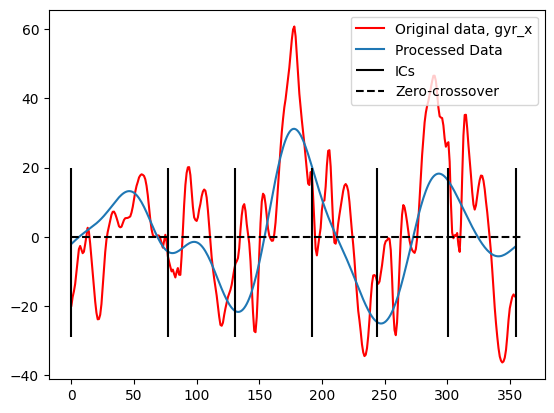

In [11]:
plt.plot(data_list[0]["gyr_x"], color = 'red', label = 'Original data, gyr_x')
plt.plot(algo.processed_data, label = 'Processed Data')
plt.vlines(ic_list[0], ymin = -29, ymax = 20, colors='black', label = "ICs")
plt.hlines(0, xmin= 0, xmax= 360, linestyles='--', color = "black", label = "Zero-crossover")
plt.legend(loc = "upper right")

____
###  That's it!